# running a single two-island simulation and then visualize the fit

In [2]:
import msprime
import sys
import pickle
sys.path.insert(0, "/mnt/archgen/users/yilei/IBD/two_island_final/code")
from analytic import *
from ts_utility import *
import numpy as np

In [ ]:
N = 500
T = 20
demography = msprime.Demography()
demography.add_population(name="A", initial_size=N/2)
demography.add_population(name="B", initial_size=N/2)
demography.add_population(name="AB", initial_size=N)
demography.add_population_split(time=T, derived=["A", "B"], ancestral="AB")
print(f'simulating two-island model with ancestral pop size {N} with split time {T}...')

sampling = {'A':10, 'B':10}
prms = [[sampling, demography, ch, 1000, 1, np.inf, 4.0] for ch in range(1,23)]
results = multi_run(simAndGetIBD_two_island_chrom_fullARG, prms, processes=12, output=False)
aggregated = []
for result in results:
    aggregated.extend(result)
aggregated = np.array(aggregated)

pickle.dump(aggregated, open('ibd_batch1.pickle', 'wb'))

# aggregated = pickle.load(open('./inference/IBD_pickle/T30_N2000/ibd_batch18.pickle', 'rb'))
# print(f'number of ibd segments: {len(aggregated)}')



In [6]:
import pickle
aggregated = pickle.load(open('/mnt/archgen/users/yilei/IBD/two_island_final/inference/IBD_pickle/T20_N500/ibd_batch1.pickle', 'rb'))
lambda_exp_mle, lambda_exp_se = two_island_noGeneFlow_constNe_truncExp(aggregated, 5.0, 15.0)
chrlens = np.array([286.279, 268.840, 223.361, 214.688, 204.089, 192.040, 187.221, 168.003, 166.359, 181.144, 158.219, 174.679, 125.706, 120.203, 141.860, 134.038, 128.491, 117.709, 107.734, 108.267, 62.786, 74.110])
twoIsland_mle, twoIsland_se = two_island_noGeneFlow_constNe_MLE_multiStart(aggregated, 5.0, 15.0, 0.1, chrlens, 2*sampling['A']*2*sampling['B'])

split time from exp fit: 29.716(27.952 - 31.48)
hessian info: info(error_estimate=array([[0.00127062, 0.00127062],
       [0.00127062, 0.00127062]]), final_step=array([[1.e-04, 1.e-04],
       [1.e-04, 1.e-04]]), index=array([0, 1, 2, 3]))
inverse of hessian: [[ 1.00000000e+00 -3.53410516e-17]
 [-9.82684170e-18  1.00000000e+00]]
###########################################################
split time: 19.25(17.24 - 21.26)
ancestral pop size: 493.88(423.13 - 564.63)
curr_min: -2756.1095168157517
      fun: -2756.1095168157517
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747313e-05,  0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 120
      nit: 19
     njev: 40
   status: 0
  success: True
        x: array([ 19.25062879, 493.88141159])
###########################################################


In [12]:
twoIsland_se

array([  25.83565563, 3942.6992257 ])

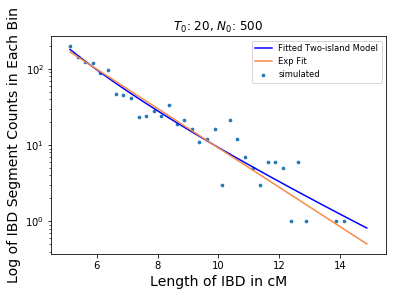

In [9]:
import matplotlib.pyplot as plt

minl = 5
maxl = 15
step = 0.25
bins = np.arange(minl, maxl+step, step)
midpoint = (bins[:-1] + bins[1:])/2

numPairs = 2*sampling['A']*2*sampling['B']
lambdas = np.zeros((len(chrlens), len(midpoint)))
for i, g in enumerate(chrlens):
    lambdas[i] += two_island_noGeneFlow_constNe_eq5(g/100, midpoint/100, twoIsland_mle[0], twoIsland_mle[1])
    #lambdas[i] += two_island_noGeneFlow_constNe_eq5(g/100, midpoint/100, T, N)
lambdas = np.sum(lambdas, axis=0)*numPairs*(step/100)

x, *_ = plt.hist(aggregated, bins=bins, alpha=0)
plt.scatter(midpoint, x, label='simulated', s=7.0)
plt.plot(midpoint, lambdas, color='blue', label='Fitted Two-island Model')
rate = lambda_exp_mle
#rate = T/50
normalizing_const = np.exp(-rate*minl) - np.exp(-rate*maxl)
plt.plot(midpoint, len(aggregated)*step*rate*np.exp(-rate*midpoint)/normalizing_const, color='#f58a42', label='Exp Fit')
plt.title(f'$T_0$: {T}, $N_0$: {N}')
plt.xlabel('Length of IBD in cM', fontsize=14)
plt.ylabel(f'Log of IBD Segment Counts in Each Bin', fontsize=14)
plt.yscale('log')
plt.legend(loc='upper right', fontsize='small')
plt.savefig(f'T{T}_N{N}_sample.png', dpi=300)
plt.savefig(f'T{T}_N{N}_sample.pdf', dpi=300)

In [8]:
import pickle
pickle.dump(aggregated, open('T20_N500_sample_ibd.pickle', 'wb'))
print(len(aggregated))

1203


In [3]:
ts = msprime.sim_ancestry(
    3, recombination_rate=0.1, sequence_length=2,
    record_full_arg=True, random_seed=42)
for tree in ts.trees():
    print(tree.draw(format="unicode"))
    print(tree.time(12))

     13    
   ┏━━┻━━┓ 
   ┃    12 
   ┃    ┏┻┓
   ┃   11 ┃
   ┃    ┃ ┃
   ┃    9 ┃
   ┃    ┃ ┃
   8    ┃ ┃
 ┏━┻━┓  ┃ ┃
 ┃   7  ┃ ┃
 ┃  ┏┻┓ ┃ ┃
 6  ┃ ┃ ┃ ┃
┏┻┓ ┃ ┃ ┃ ┃
0 5 2 3 1 4

1.2313039711205165
     13    
   ┏━━┻━━┓ 
   ┃    12 
   ┃    ┏┻┓
   ┃   11 ┃
   ┃    ┃ ┃
   ┃   10 ┃
   ┃    ┃ ┃
   8    ┃ ┃
 ┏━┻━┓  ┃ ┃
 ┃   7  ┃ ┃
 ┃  ┏┻┓ ┃ ┃
 6  ┃ ┃ ┃ ┃
┏┻┓ ┃ ┃ ┃ ┃
0 5 2 3 1 4

1.2313039711205165


In [4]:
ts_sim = ts.simplify(samples=[1,4], keep_unary=True, keep_input_roots=True)
for tree in ts_sim.trees():
    print(tree.draw(format="unicode"))
    print(tree.mrca(0,1))

 6 
 ┃ 
 5 
┏┻┓
4 ┃
┃ ┃
2 ┃
┃ ┃
0 1

5
 6 
 ┃ 
 5 
┏┻┓
4 ┃
┃ ┃
3 ┃
┃ ┃
0 1

5
